#  KPMG AU Virtual Experience Program

## Task 2: Data Insights
Targeting high value customers based on customer demographics and attributes.

In [1]:
# importing the necessary packages and libraries
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime as dt
%matplotlib inline

In [3]:
#Save the list of all csv files
cust_addr = pd.read_csv('/content/cust_addr_cleaned.csv')
cust_demo = pd.read_csv('/content/cust_demo_cleaned.csv')
new_cust = pd.read_csv('/content/new_cust_cleaned.csv')
trans = pd.read_csv('/content/trans_cleaned.csv')

In [4]:
#Merged all files in the list based on matching 'customer id' column
cust_demo_addr = pd.merge(cust_demo, cust_addr, on=['customer_id'])
cust_demo_addr_trans = pd.merge(cust_demo_addr, trans, on=['customer_id'])

In [5]:
#Export to csv
cust_demo_addr_trans.to_csv( "merged.csv", index=False, encoding='utf-8-sig')

### Analysis on Current Customer 

In [6]:
#Ascending order
df = cust_demo_addr_trans.sort_values(by=['customer_id'])

In [7]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 88 to 4637
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   DOB                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [9]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19794.000000,19968.000000
mean,1740.254307,48.757412,10.689052,2987.623347,7.516376,9997.846504,45.365986,0.501102,1107.780004,556.082756,38198.751474
std,1009.819066,28.611359,5.611093,851.306647,2.824783,5773.929973,30.750115,0.500011,582.852548,405.798188,2860.784340
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38206.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [10]:
print(df.duplicated().sum())

0


In [11]:
# count rows of missing data for each column
missing_number=df.isnull().sum().sort_values(ascending=False)

# Calculate percentage of null value
missing_percentage=missing_number*100/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head()

,missing number,missing percentage
last_name,642,3.215144
DOB,446,2.233574
standard_cost,174,0.871394
customer_id,0,0.000000
property_valuation,0,0.000000


In [12]:
df['last_name'].fillna(method='ffill', inplace = True)

In [13]:
df['DOB'].fillna(method='ffill', inplace = True)

In [14]:
df.standard_cost.mode()

0    388.92
dtype: float64

In [15]:
df.standard_cost.mean()

556.082755885636

In [16]:
df['standard_cost'].fillna(df['standard_cost'].mean(), inplace = True)

In [17]:
df['DOB'] = df['DOB'].apply(pd.to_datetime)

In [18]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [19]:
ref_date = dt.datetime.now()
df['Age'] = df['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

df = df[df.Age < 100]

In [20]:
df['transaction_month'] = pd.DatetimeIndex(df['DOB']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df['profit'] = df['list_price'] - df['standard_cost']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,69,10,189.28
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,69,10,75.75
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,69,10,509.97
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Solex,Standard,medium,medium,1577.53,826.51,39526.0,69,10,751.02
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,69,10,709.34


In [23]:
df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0,55,7,583.27
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,55,7,827.16
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,55,7,15.08
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,55,7,198.22
4637,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,Solex,Standard,medium,medium,71.49,53.62,41245.0,55,7,17.87


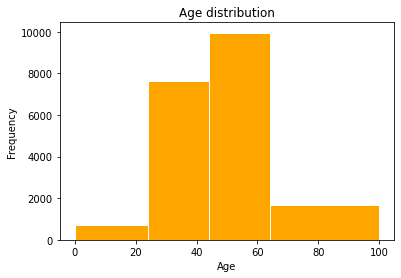

In [24]:
plt.hist(df['Age'], color = 'orange', edgecolor = 'white', bins=[0,24,44,64,100])
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

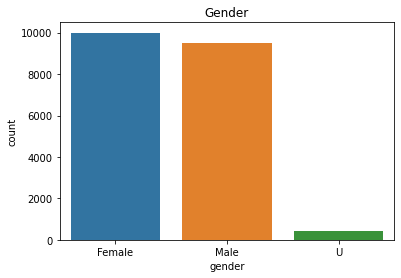

In [25]:
sn.countplot(x = 'gender', data = df)
plt.title('Gender')
plt.show()

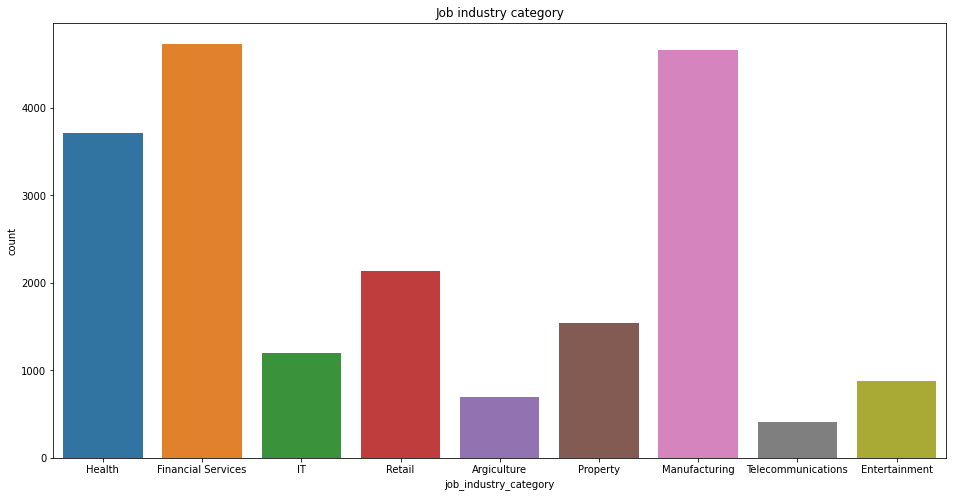

In [26]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df)
plt.title('Job industry category')
plt.show()

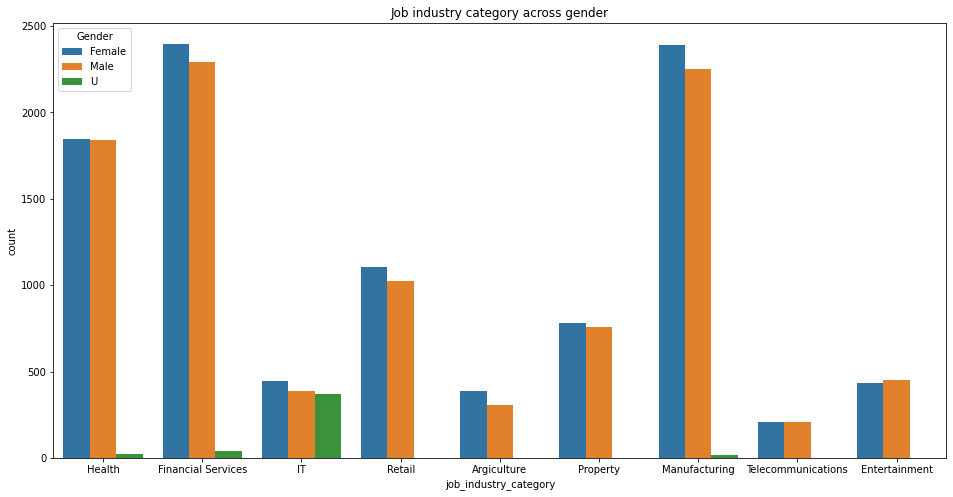

In [27]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df, hue='gender')
plt.legend(title='Gender')
plt.title('Job industry category across gender')
plt.show()

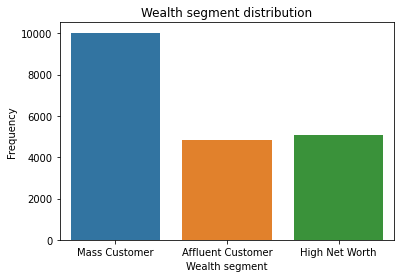

In [28]:
sn.countplot(x = 'wealth_segment', data = df)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.show()

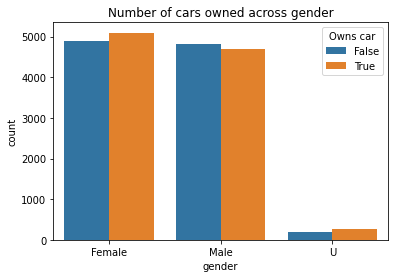

In [29]:
sn.countplot(x='gender', data=df, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.show()

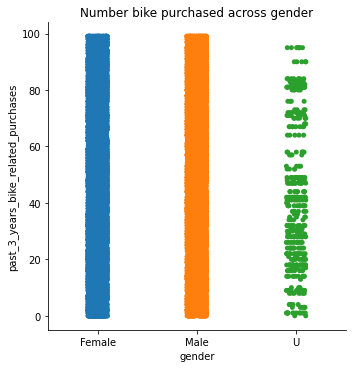

In [30]:
sn.catplot(data=df, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.show()

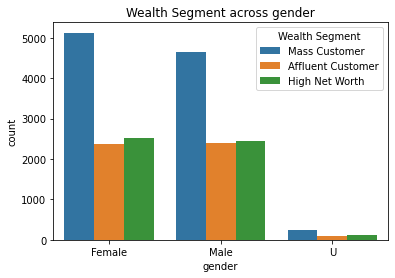

In [31]:
sn.countplot(x='gender', data=df, hue='wealth_segment')
plt.legend(title='Wealth Segment')
plt.title('Wealth Segment across gender')
plt.show()

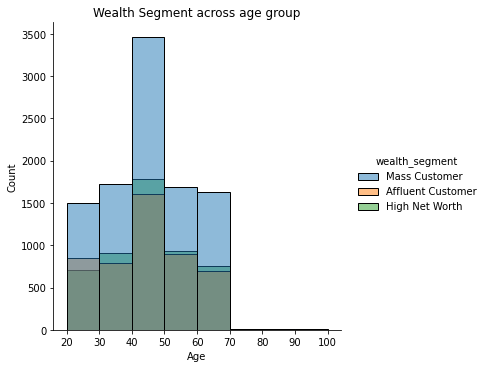

In [32]:
sn.displot(x='Age', binwidth=10, data=df, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.show()

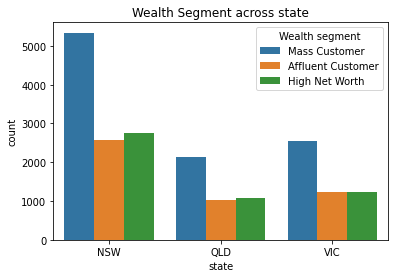

In [33]:
sn.countplot(x='state', data=df, hue='wealth_segment')
plt.legend(title='Wealth segment')
plt.title('Wealth Segment across state')
plt.show()

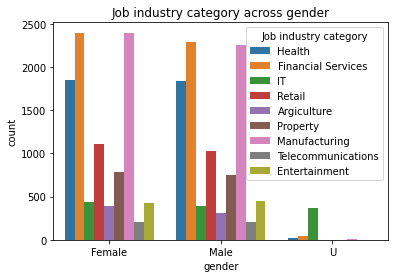

In [34]:
sn.countplot(x='gender', data=df, hue='job_industry_category', order = df['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.show()

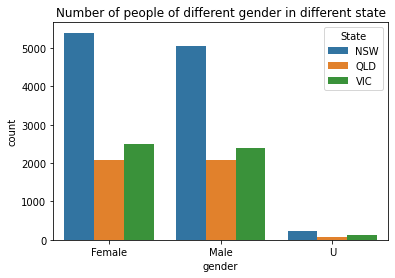

In [35]:
sn.countplot(x='gender', data=df, hue='state')
plt.legend(title='State')
plt.title('Number of people of different gender in different state')
plt.show()

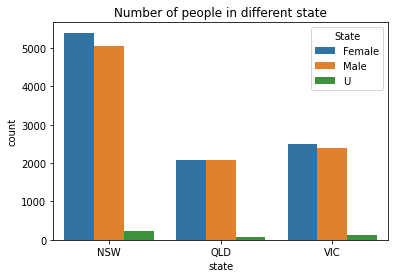

In [36]:
sn.countplot(x = 'state', data = df, hue = 'gender')
plt.legend(title='State')
plt.title('Number of people in different state')
plt.show()

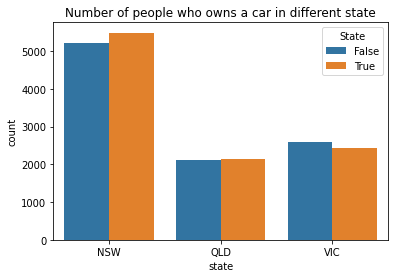

In [37]:
sn.countplot(x = 'state', data = df, hue = 'owns_car')
plt.legend(title='State')
plt.title('Number of people who owns a car in different state')
plt.show()

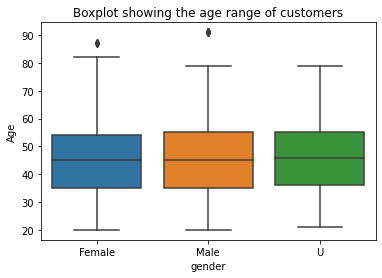

In [38]:
sn.boxplot(x = df['gender'], y = df['Age'])
plt.title('Boxplot showing the age range of customers')
plt.show()

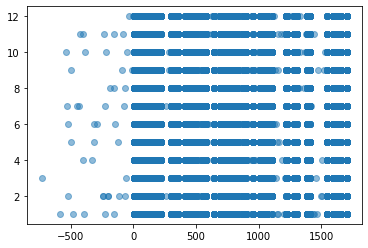

In [39]:
plt.scatter(df['profit'], df['transaction_month'], alpha=0.5)
colors=np.random.rand()
plt.show()

### Analysis on Target Customer

In [40]:
df2 = new_cust

In [41]:
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  1000 non-null   object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [43]:
df2.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881722
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293550
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649500
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.719000


In [44]:
df2.duplicated().sum()

0

In [45]:
# count rows of missing data for each column
missing_number=df2.isnull().sum().sort_values(ascending=False)

# Calculate percentage of null value
missing_percentage=missing_number*100/len(df2)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head()

,missing number,missing percentage
first_name,0,0.0
last_name,0,0.0
Rank,0,0.0
property_valuation,0,0.0
country,0,0.0


In [46]:
df2['new_id'] = df2.index

In [47]:
df2['DOB'] = pd.to_datetime(df2['DOB'], errors='coerce')

In [48]:
df2.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
new_id                      

In [49]:
df2['DOB'] = df2['DOB'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df2['DOB'].astype('datetime64')

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 1000, dtype: datetime64[ns]

In [50]:
df2['DOB'] = df2['DOB'].fillna(df2['DOB'].mode())

In [51]:
ref_date2 = dt.datetime.now()
df2['Age'] = df2['DOB'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [52]:
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,new_id,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719,0,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719,1,52.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719,2,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703,3,43.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703,4,57.0


In [53]:
df2 = df2[df2.Age < 100]

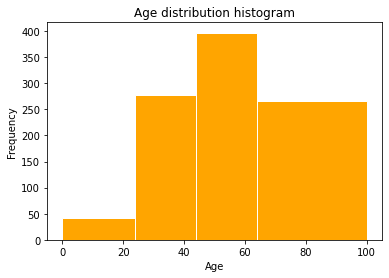

In [54]:
plt.hist(df2['Age'], color = 'orange', edgecolor = 'white', bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

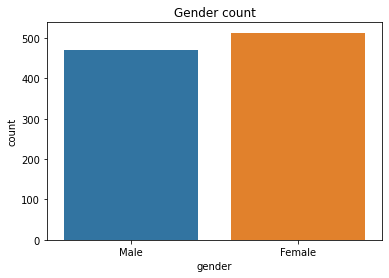

In [55]:
sn.countplot(x = 'gender', data = df2)
plt.title('Gender count')
plt.show()

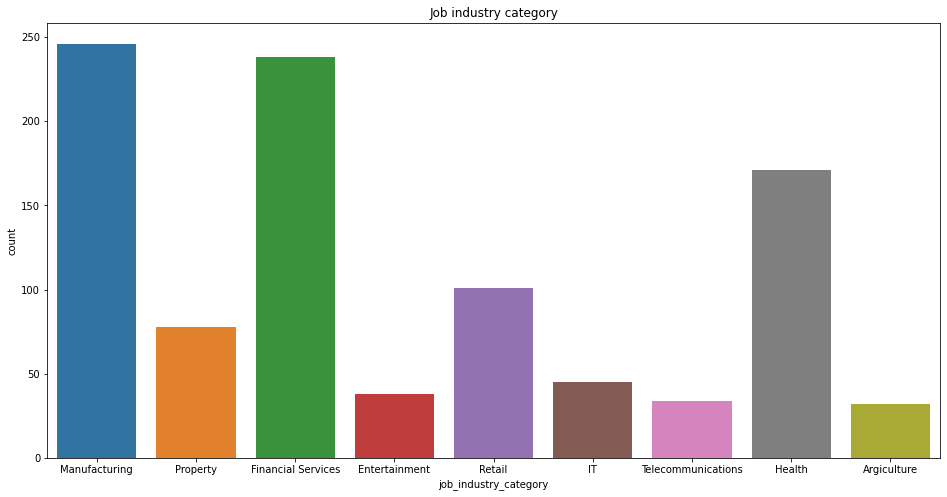

In [56]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df2)
plt.title('Job industry category')
plt.show()

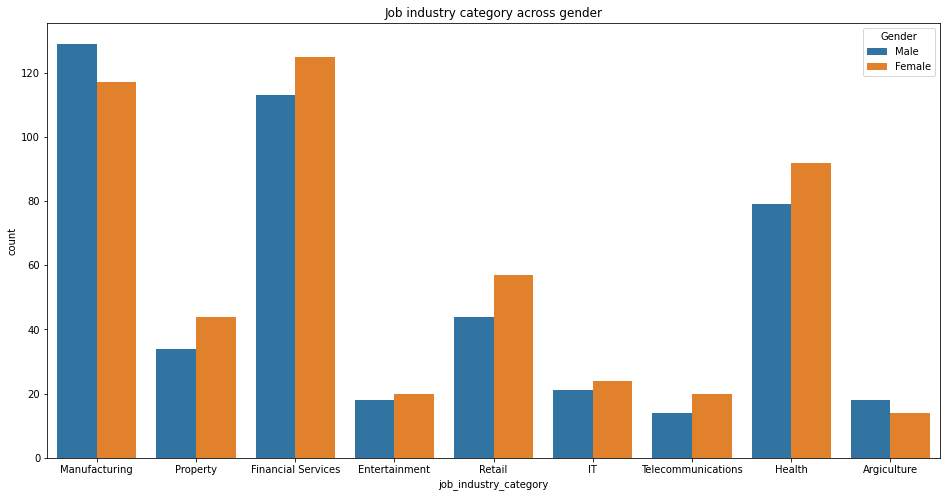

In [57]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df2, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.show()

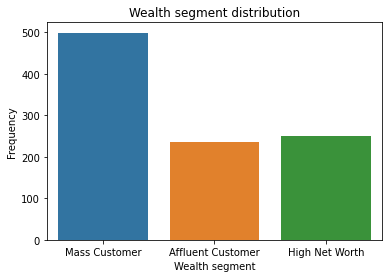

In [58]:
sn.countplot(x = 'wealth_segment', data = df2)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.show()

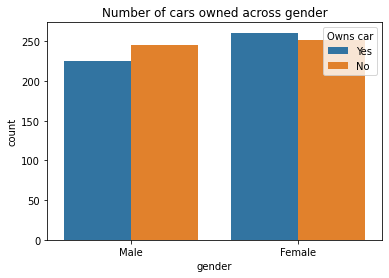

In [59]:
sn.countplot(x='gender', data=df2, hue='owns_car')
plt.legend(title='Owns car')
plt.title('Number of cars owned across gender')
plt.show()

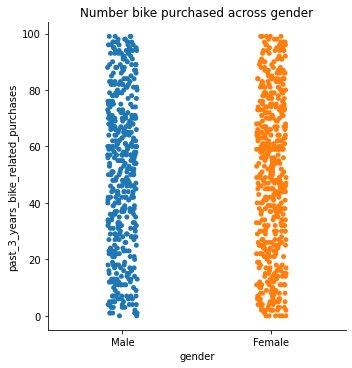

In [60]:
sn.catplot(data=df2, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.show()

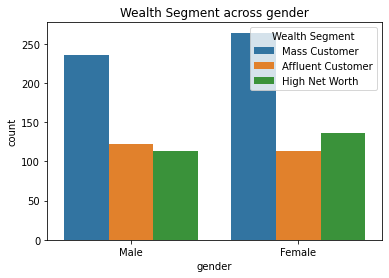

In [61]:
sn.countplot(x='gender', data=df2, hue='wealth_segment')
plt.legend(title='Wealth Segment')
plt.title('Wealth Segment across gender')
plt.show()

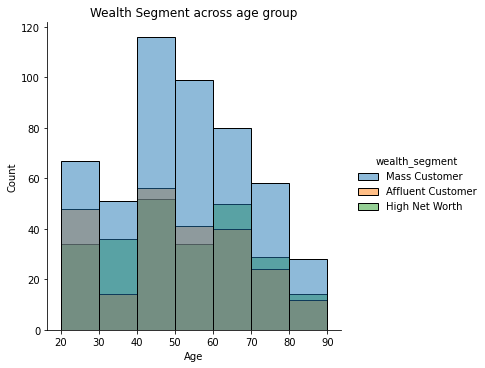

In [62]:
sn.displot(x='Age', binwidth=10, data=df2, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.show()

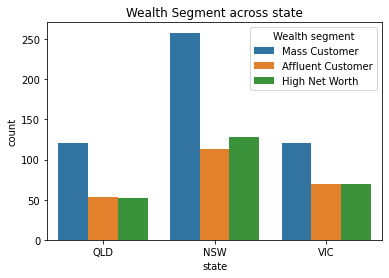

In [63]:
sn.countplot(x='state', data=df2, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.show()

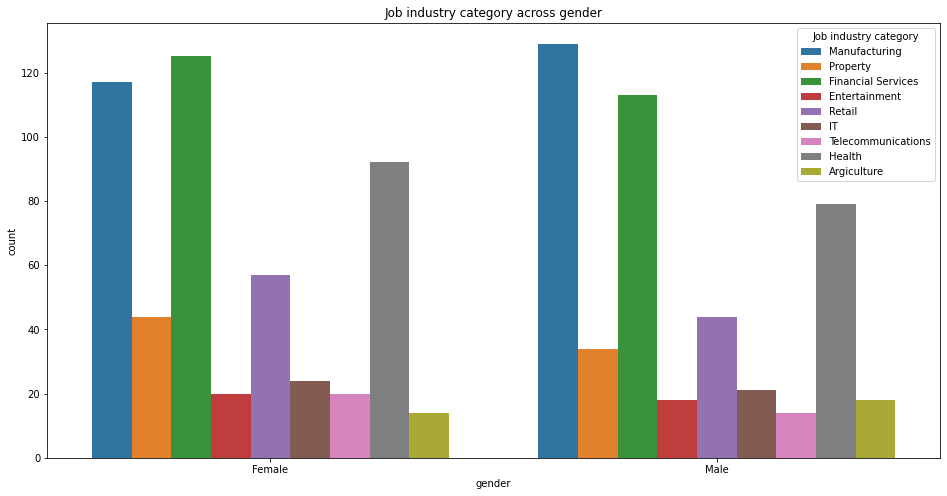

In [64]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df2, hue='job_industry_category', order = df2['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.show()

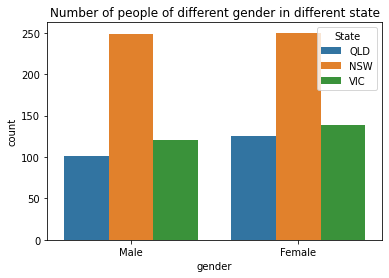

In [65]:
sn.countplot(x='gender', data=df2, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people of different gender in different state')
plt.show()

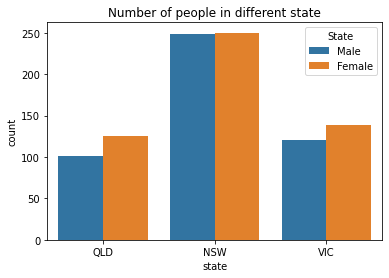

In [66]:
sn.countplot(x = 'state', data = df2, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people in different state')
plt.show()

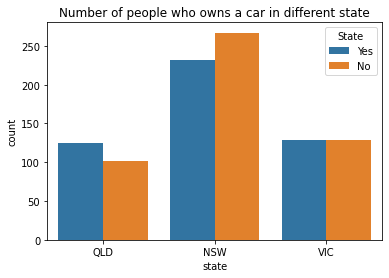

In [67]:
sn.countplot(x = 'state', data = df2, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people who owns a car in different state')
plt.show()

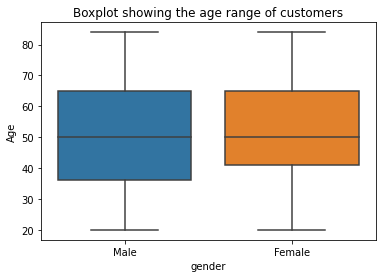

In [68]:
sn.boxplot(x = df2['gender'], y = df2['Age'])
plt.title('Boxplot showing the age range of customers')
plt.show()

In [69]:
#print the final file to excel
df.to_excel('./current_customers.xlsx', index=False)
df2.to_excel('./target_new_customers.xlsx', index=False)